# ASSOCIATION RULES CHECKPOINT

# Let's try a small dataset

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder



In [103]:
dataset=[['skirt','sneakers','scarf','pants','hat'],[ 'sunglasses','skirt','sneakers','pants','hat'],[ 'dress','sandals','scarf','pants','heels'],['dress','necklace','earrings','scarf','hat','heels','hat'],['earrings','skirt', 'scarf','shirt', 'pants']]

In [104]:
te=TransactionEncoder()
te.ary=te.fit(dataset).transform(dataset)
df=pd.DataFrame(te.ary, columns=te.columns_)
df

,dress,earrings,hat,heels,necklace,pants,sandals,scarf,shirt,skirt,sneakers,sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [105]:
df.dtypes

dress         bool
earrings      bool
hat           bool
heels         bool
necklace      bool
pants         bool
sandals       bool
scarf         bool
shirt         bool
skirt         bool
sneakers      bool
sunglasses    bool
dtype: object

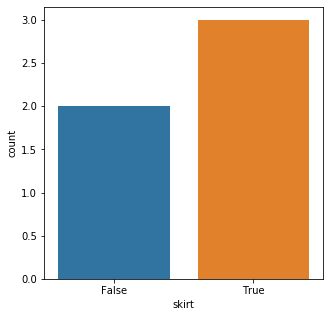

In [106]:
plt.figure(figsize=(5,5))
plt.title("")
sns.countplot(data=df, x="skirt")

In [107]:
from mlxtend.frequent_patterns import apriori
apriori(df,min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [108]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.6,(hat)
1,0.8,(pants)
2,0.8,(scarf)
3,0.6,(skirt)
4,0.6,"(pants, scarf)"
5,0.6,"(pants, skirt)"


In [109]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pants),(scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(scarf),(pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(pants),(skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(skirt),(pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [110]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="lift", min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(skirt),(pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


CONCLUSION 1: As they are linked, we have to  put pants and skirts one next to the other. 

# Let's try a bigger dataset.

In [111]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [112]:
b=pd.read_csv(r'c:\Users\hp\Desktop\Market_Basket_Optimisation.csv')

In [113]:
b.head(5)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
b.dtypes

shrimp                object
almonds               object
avocado               object
vegetables mix        object
green grapes          object
whole weat flour      object
yams                  object
cottage cheese        object
energy drink          object
tomato juice          object
low fat yogurt        object
green tea             object
honey                 object
salad                 object
mineral water         object
salmon                object
antioxydant juice     object
frozen smoothie       object
spinach               object
olive oil            float64
dtype: object

In [115]:
te=TransactionEncoder()
te.ary=te.fit(b).transform(b)
b =pd.DataFrame(te.ary, columns=te.columns_)
b 

,,a,b,c,d,e,f,g,h,i,...,p,r,s,t,u,v,w,x,y,z
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,False,False,False,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,True,True,False,False,True,False,True,False,True,...,False,False,True,True,False,True,False,True,False,False
4,True,True,False,False,False,True,False,True,False,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [116]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [117]:
from mlxtend.frequent_patterns import apriori
apriori(b,min_support=0.001)

,support,itemsets
0,0.001600,(0)
1,0.002000,(1)
2,0.001600,(5)
3,0.001200,(9)
4,0.001067,(12)
5,0.001067,(13)
6,0.001333,(14)
7,0.001467,(15)
8,0.001067,(17)
9,0.001333,(18)


In [118]:
frequent_itemsets=apriori(b, min_support=0.001, use_colnames=True)
frequent_itemsets



,support,itemsets
0,0.001600,( )
1,0.002000,(a)
2,0.001600,(e)
3,0.001200,(i)
4,0.001067,(l)
5,0.001067,(m)
6,0.001333,(n)
7,0.001467,(o)
8,0.001067,(r)
9,0.001333,(s)


In [119]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( ),(a),0.001600,0.002000,0.001200,0.750000,375.000000,0.001197,3.992000
1,( ),(e),0.001600,0.001600,0.001467,0.916667,572.916667,0.001464,11.980800
2,(e),( ),0.001600,0.001600,0.001467,0.916667,572.916667,0.001464,11.980800
3,( ),(t),0.001600,0.001200,0.001200,0.750000,625.000000,0.001198,3.995200
4,(t),( ),0.001200,0.001600,0.001200,1.000000,625.000000,0.001198,inf
5,(o),(a),0.001467,0.002000,0.001067,0.727273,363.636364,0.001064,3.659333
6,(s),(a),0.001333,0.002000,0.001067,0.800000,400.000000,0.001064,4.990000
7,(t),(a),0.001200,0.002000,0.001067,0.888889,444.444444,0.001064,8.982000
8,(t),(e),0.001200,0.001600,0.001067,0.888889,555.555556,0.001065,8.985600
9,"( , e)",(a),0.001467,0.002000,0.001067,0.727273,363.636364,0.001064,3.659333


In [120]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="lift", min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( ),(a),0.001600,0.002000,0.001200,0.750000,375.000000,0.001197,3.992000
1,(a),( ),0.002000,0.001600,0.001200,0.600000,375.000000,0.001197,2.496000
2,( ),(e),0.001600,0.001600,0.001467,0.916667,572.916667,0.001464,11.980800
3,(e),( ),0.001600,0.001600,0.001467,0.916667,572.916667,0.001464,11.980800
4,( ),(t),0.001600,0.001200,0.001200,0.750000,625.000000,0.001198,3.995200
5,(t),( ),0.001200,0.001600,0.001200,1.000000,625.000000,0.001198,inf
6,(a),(e),0.002000,0.001600,0.001067,0.533333,333.333333,0.001063,2.139429
7,(e),(a),0.001600,0.002000,0.001067,0.666667,333.333333,0.001063,2.994000
8,(o),(a),0.001467,0.002000,0.001067,0.727273,363.636364,0.001064,3.659333
9,(a),(o),0.002000,0.001467,0.001067,0.533333,363.636364,0.001064,2.139714


CONCLUSION 2: As they are linked items, Olive oil('t') should be placed with shrimp ('a') and green grapes ('e').